In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


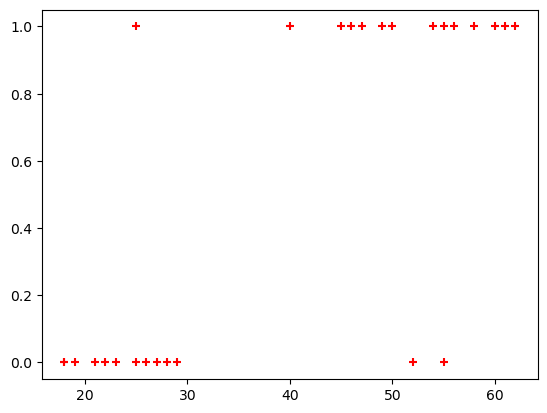

In [4]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='red')
plt.show()

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)

In [8]:
X_test

,age
7,60
5,56
18,19


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
model.predict(X_test)

array([1, 1, 0])

In [12]:
model.score(X_test,y_test)

1.0

In [13]:
model.predict_proba(X_test)

array([[0.06470655, 0.93529345],
       [0.10327333, 0.89672667],
       [0.92775258, 0.07224742]])

In [14]:
model.predict([[56]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

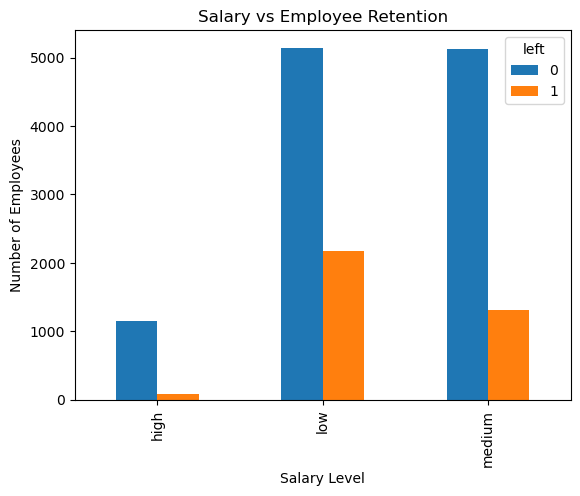

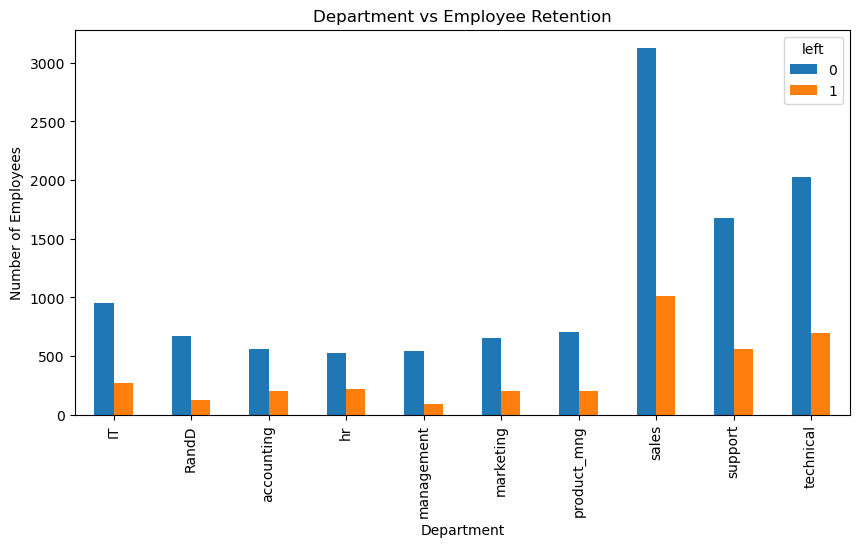

Model Accuracy: 0.7608


In [15]:
# ================================
# Employee Retention Analysis
# ================================

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --------------------------------
# 1. Load Dataset
# --------------------------------
df = pd.read_csv("HR_comma_sep.csv")   # change filename if needed
print(df.head())

# --------------------------------
# 2. EDA: Salary vs Retention
# --------------------------------
salary_retention = pd.crosstab(df['salary'], df['left'])
salary_retention.plot(kind='bar')

plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.title("Salary vs Employee Retention")
plt.show()

# --------------------------------
# 3. EDA: Department vs Retention
# --------------------------------
dept_retention = pd.crosstab(df['Department'], df['left'])
dept_retention.plot(kind='bar', figsize=(10,5))

plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Department vs Employee Retention")
plt.show()

# --------------------------------
# 4. Feature Selection (from EDA)
# --------------------------------
df_model = df[['salary', 'Department', 'left']]

# One-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)

# --------------------------------
# 5. Split X and y
# --------------------------------
X = df_model.drop('left', axis=1)
y = df_model['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# --------------------------------
# 6. Train Logistic Regression
# --------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --------------------------------
# 7. Predictions & Accuracy
# --------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [17]:
digits = load_digits()

In [18]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [19]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [23]:
len(X_train)

1437

In [24]:
len(X_test)

360

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
model.score(X_test,y_test)

0.9666666666666667

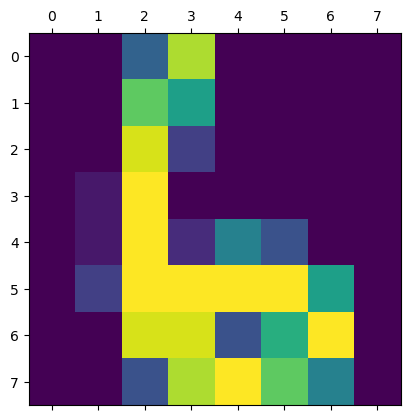

In [28]:
plt.matshow(digits.images[67])
# 0      → Black     Middle → Gray      Max    → White

In [29]:
digits.target[67]

np.int64(6)

In [30]:
model.predict([digits.data[67]])

array([6])

In [31]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [32]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

# 9

In [33]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [34]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
inputs['company_n'] = le.fit_transform(inputs['company'])
inputs['job_n'] = le.fit_transform(inputs['job'])
inputs['degree_n'] = le.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [37]:
input_n = inputs.drop(['company','job','degree'],axis='columns')
input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


## Decision Tree


In [38]:
'''
Logistic Regression
Linear model
Assumes a linear relationship between features and log-odds
Decision boundary is a straight line / plane

Decision Tree
Non-linear model
Splits data using if–else rules
Decision boundary can be complex and curved

📌 Use Decision Tree when relationships are NOT linear
'''

'\nLogistic Regression\nLinear model\nAssumes a linear relationship between features and log-odds\nDecision boundary is a straight line / plane\n\nDecision Tree\nNon-linear model\nSplits data using if–else rules\nDecision boundary can be complex and curved\n\n📌 Use Decision Tree when relationships are NOT linear\n'

In [39]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [40]:
model.fit(input_n,target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
model.score(input_n,target)

1.0

In [42]:
model.predict([[2,2,1]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Exercise

In [43]:
d = pd.read_csv('titanic.csv')
d

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [44]:
d['sex_n'] = le.fit_transform(d['Sex'])
d

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,sex_n
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1,1


In [45]:
# class, sex, age , Fare - X
# survived - y
X = d[['Pclass','sex_n','Age','Fare']]
y = d['Survived']
model.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
model.predict([[2,1,25,12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [47]:
model.score(X,y)

0.9797979797979798

# 10 Support Vector

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()

In [49]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [55]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [56]:
from matplotlib import pyplot as plt
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

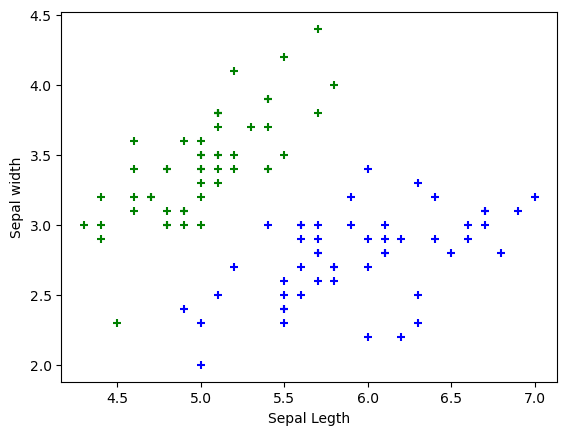

In [57]:
plt.xlabel('Sepal Legth')
plt.ylabel('Sepal width')
plt.scatter(df0[['sepal length (cm)']],df0[['sepal width (cm)']],color='green',marker='+')
plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color='blue',marker='+')

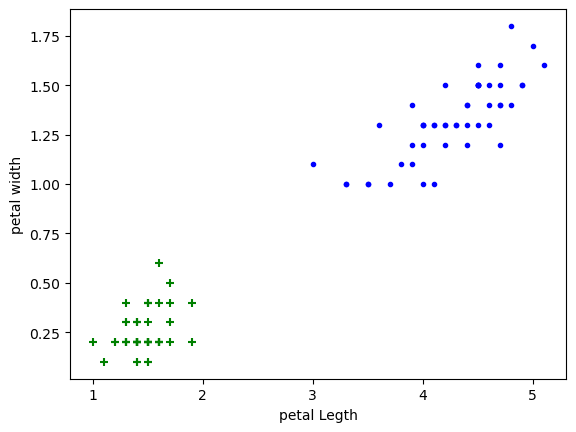

In [58]:
plt.xlabel('petal Legth')
plt.ylabel('petal width')
plt.scatter(df0[['petal length (cm)']],df0[['petal width (cm)']],color='green',marker='+')
plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color='blue',marker='.')

In [59]:
X = df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [62]:
print(len(X_train))
print(len(X_test))

120
30


In [63]:
from sklearn.svm import SVC
model = SVC(C=10) #shift+tab

In [64]:
model.fit(X_train,y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [65]:
model.score(X_test,y_test)

0.9666666666666667

## Create KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [67]:
knn.score(X_test,y_test)

0.9666666666666667

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred) #<--- y_pred
cm

array([[ 7,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]])

In [62]:
# Exercise
# 1. Load Dataset
# -----------------------------------
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

# -----------------------------------
# 2. Train-Test Split (80% training)
# -----------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------
# 3. Train SVM with LINEAR kernel
# -----------------------------------
from sklearn.svm import SVC

linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

linear_accuracy = linear_model.score(X_test, y_test)
print("Linear Kernel Accuracy:", linear_accuracy)

# -----------------------------------
# 4. Train SVM with RBF kernel
# -----------------------------------
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

rbf_accuracy = rbf_model.score(X_test, y_test)
print("RBF Kernel Accuracy:", rbf_accuracy)

# -----------------------------------
# 5. Hyperparameter Tuning (C and Gamma)
# -----------------------------------
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# -----------------------------------
# 6. Final Tuned Model Accuracy
# -----------------------------------
best_model = grid.best_estimator_
final_accuracy = best_model.score(X_test, y_test)

print("Final Tuned Model Accuracy:", final_accuracy)


Linear Kernel Accuracy: 0.9777777777777777
RBF Kernel Accuracy: 0.9861111111111112
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy: 0.9895639759969029
Final Tuned Model Accuracy: 0.9888888888888889


In [66]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

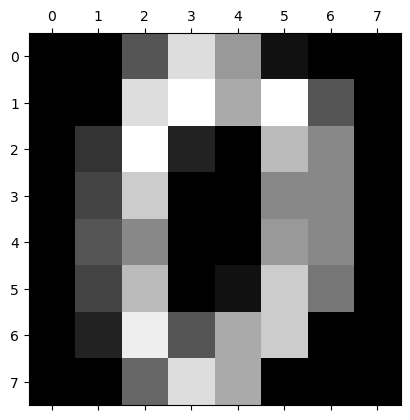

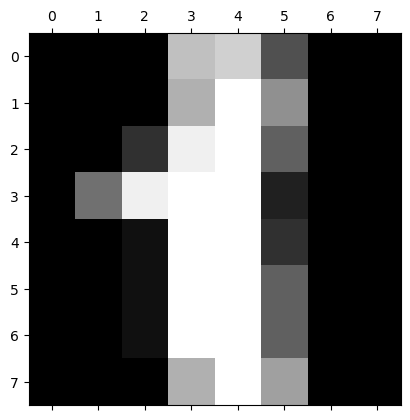

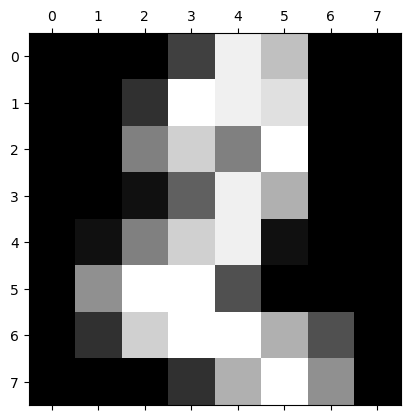

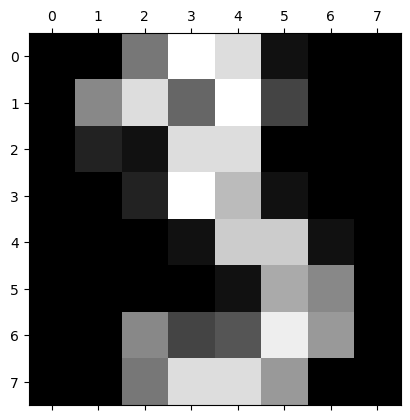

In [67]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [68]:
digits.data[:5]    # 8 x 8

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [69]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [71]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [75]:
len(X_train)

1437

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
model.score(X_test,y_test)

0.9861111111111112

In [85]:
y_predicted = model.predict(X_test)
y_predicted

array([5, 0, 3, 1, 8, 9, 1, 5, 7, 0, 1, 0, 9, 1, 8, 1, 0, 0, 9, 5, 0, 9,
       4, 9, 8, 3, 9, 0, 7, 5, 3, 6, 9, 9, 8, 8, 9, 9, 0, 0, 5, 7, 9, 8,
       0, 6, 7, 9, 3, 2, 0, 4, 3, 6, 5, 2, 5, 3, 6, 7, 2, 6, 2, 4, 3, 0,
       9, 8, 5, 4, 7, 7, 8, 5, 5, 0, 1, 2, 9, 5, 3, 1, 1, 1, 4, 0, 4, 3,
       1, 9, 2, 9, 4, 9, 6, 5, 5, 7, 7, 3, 9, 6, 2, 2, 8, 6, 3, 1, 6, 4,
       0, 3, 6, 5, 0, 8, 0, 1, 5, 4, 8, 7, 1, 9, 8, 1, 0, 0, 9, 7, 7, 1,
       8, 8, 9, 2, 1, 5, 2, 6, 6, 3, 7, 4, 9, 3, 5, 3, 2, 6, 3, 6, 6, 5,
       7, 7, 9, 5, 4, 9, 6, 4, 1, 7, 3, 3, 7, 8, 8, 7, 9, 1, 3, 9, 9, 4,
       5, 9, 2, 6, 4, 6, 0, 7, 8, 3, 6, 8, 3, 1, 6, 8, 6, 3, 2, 9, 2, 4,
       3, 2, 5, 7, 0, 5, 5, 6, 2, 3, 9, 5, 2, 3, 1, 5, 5, 0, 9, 2, 7, 4,
       7, 9, 5, 0, 1, 4, 6, 5, 6, 1, 2, 4, 1, 5, 4, 4, 5, 7, 9, 4, 4, 8,
       1, 4, 8, 6, 4, 8, 1, 3, 9, 0, 3, 3, 1, 1, 3, 5, 3, 7, 9, 8, 0, 4,
       6, 7, 1, 0, 3, 5, 0, 8, 2, 4, 1, 1, 1, 1, 1, 1, 7, 9, 2, 3, 3, 6,
       6, 9, 7, 3, 2, 2, 8, 8, 2, 1, 9, 8, 4, 0, 8,

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 42]])

### Exercise

In [88]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

X = iris.data
y = iris.target

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

default_score = model.score(X_test, y_test)
print("Accuracy with 10 trees:", default_score)

Accuracy with 10 trees: 1.0


In [91]:
scores = {}

for n in [5, 10, 20, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores[n] = score
    print(f"Trees: {n}, Accuracy: {score}")


Trees: 5, Accuracy: 0.9666666666666667
Trees: 10, Accuracy: 1.0
Trees: 20, Accuracy: 1.0
Trees: 50, Accuracy: 1.0
Trees: 100, Accuracy: 1.0
Trees: 200, Accuracy: 1.0


In [92]:
best_trees = max(scores, key=scores.get)
best_score = scores[best_trees]

print("Best number of trees:", best_trees)
print("Best accuracy:", best_score)


Best number of trees: 10
Best accuracy: 1.0
